In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read in data and deal with null rows and columns
us_sm_activities = pd.read_excel('../data/us-social-media-activities-2019-by-platform.xlsx', sheet_name = 'Data', skiprows = 4)

us_sm_activities = us_sm_activities.dropna(how = 'all', axis = 0).dropna(how = 'all', axis = 1)
us_sm_activities = us_sm_activities.iloc[:, :-1]
us_sm_activities = us_sm_activities.rename(columns = {"Unnamed: 1" : "Activities"})

us_sm_activities


,Activities,Instagram,Facebook,Snapchat,Pinterest,Twitter
0,Viewing photos,77,65,64,59,42
1,Watching videos,51,46,50,21,32
2,Sharing content with everyone,45,57,46,21,32
3,Sharing content one to one,31,43,45,12,20
4,Networking,23,33,21,10,26
5,News,18,38,17,9,56
6,Finding/shopping for products,11,15,5,47,7
7,Promoting my business,9,7,6,5,7


In [8]:
us_sm_activities_bar = us_sm_activities.melt(id_vars = "Activities", var_name = "Platform", value_name = "Percentage")
us_sm_activities_bar.head()

,Activities,Platform,Percentage
0,Viewing photos,Instagram,77
1,Watching videos,Instagram,51
2,Sharing content with everyone,Instagram,45
3,Sharing content one to one,Instagram,31
4,Networking,Instagram,23


<Axes: xlabel='Activities', ylabel='Percentage'>

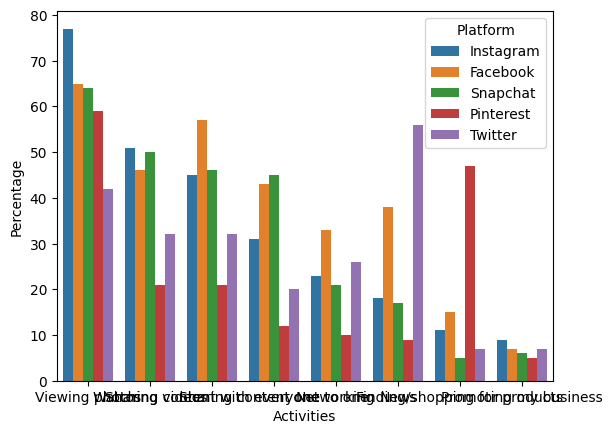

In [11]:
sns.barplot(us_sm_activities_bar, x = "Activities", y = "Percentage", hue = "Platform")

In [23]:
import plotly.express as px

# Create a bar chart using Plotly Express
fig1 = px.bar(us_sm_activities_bar, x = 'Activities', y = 'Percentage', color = 'Platform', 
             barmode = "group", title = 'US Social Media Activities by Platform in 2019')

# Show the plot
fig1.show()


In [27]:
# Melt the DataFrame to long format for Plotly Express
us_sm_activities_heat = us_sm_activities.melt(id_vars='Activities', var_name='Platform', value_name='Value')

# Create a heatmap using Plotly Express
fig = px.imshow(
    us_sm_activities_heat.pivot(index='Activities', columns='Platform', 
                                values=['Instagram', 'Facebook', 'Snapchat', 'Pinterest', ''])
)

fig.show()

KeyError: "None of [Index(['Instagram', 'Facebook', 'Snapchat', 'Pinterest', ''], dtype='object')] are in the [columns]"